In [18]:
import numpy as np
import keras
import matplotlib.pyplot as plt



In [7]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [8]:
np.random.seed(0)
number_of_features=10000
(data_train, target_train),(data_test,target_test)=imdb.load_data(num_words=number_of_features)

17473536/17464789 [==============================] - 0s 0us/step


In [9]:
tokenizer=Tokenizer(num_words=number_of_features)
features_train=tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test= tokenizer.sequences_to_matrix(data_test,mode="binary")

In [15]:
network=models.Sequential()
network.add(layers.Dense(units=16,activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16,activation="relu"))
network.add(layers.Dense(units=1,activation="sigmoid"))

In [20]:
network.compile(loss="binary_crossentropy",optimizer="rmsprop", metrics=["accuracy"])
history=network.fit(features_train,target_train,epochs=15,verbose=0,batch_size=1000,validation_data=(features_test,target_test))

In [21]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

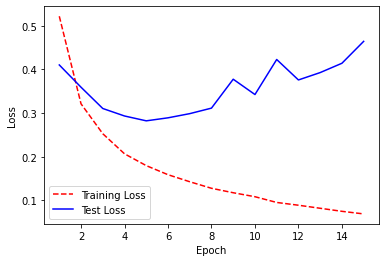

In [23]:
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss, "r--")
plt.plot(epoch_count,test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();